<a href="https://colab.research.google.com/github/taniamotha/dspl_tutorial/blob/main/DSPLtut7_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#github repository
https://github.com/suhailnoor18/DSPLtut7/blob/main/DSPLtute7.ipynb

In [ ]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#access the local file using python code
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


Task 01

In [ ]:
diabetesdf= pd.read_csv('diabetes.csv')
diabetesdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


task 02

In [ ]:
#median blood pressure for people diagnosed with diabetes.
bloodpressure = diabetesdf[diabetesdf['Outcome'] == 1]['BloodPressure'].median()
print(f" median blood pressure for diabetes people : {bloodpressure}")

 median blood pressure for diabetes people : 74.0


task 03

In [ ]:
diabetesdf['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


not balanced because the count is high for people without diabetes

task 04

In [ ]:
X = diabetesdf.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y = diabetesdf['Outcome']
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


task 06

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=43, stratify=Y)

task 07

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_c = DecisionTreeClassifier()
decisiontree_c .fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
Y_prediction = decisiontree_c.predict(X_test)
accuracy_score(Y_test, Y_prediction)

0.6302083333333334

this model has an accuracy rate of 63% accuracy, which is okay but could be better. It can predict a person's risk of diabetes, but 63% accuracy is quite low for important health decisions that need to be more reliable

task 08

In [ ]:
from sklearn.metrics import accuracy_score
Y_train_prediction = decisiontree_c.predict(X_train)
accuracy_score(Y_train, Y_train_prediction)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
Y_test_prediction =  decisiontree_c.predict(X_test)
accuracy_score(Y_test, Y_prediction)

0.6302083333333334

on test set it has only 63% of accuracy

Task 09

task 10

In [ ]:
#Create a confusion matrix to analyse the performance of the DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_prediction)

array([[91, 34],
       [37, 30]])

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       125
           1       0.47      0.45      0.46        67

    accuracy                           0.63       192
   macro avg       0.59      0.59      0.59       192
weighted avg       0.63      0.63      0.63       192



task 11

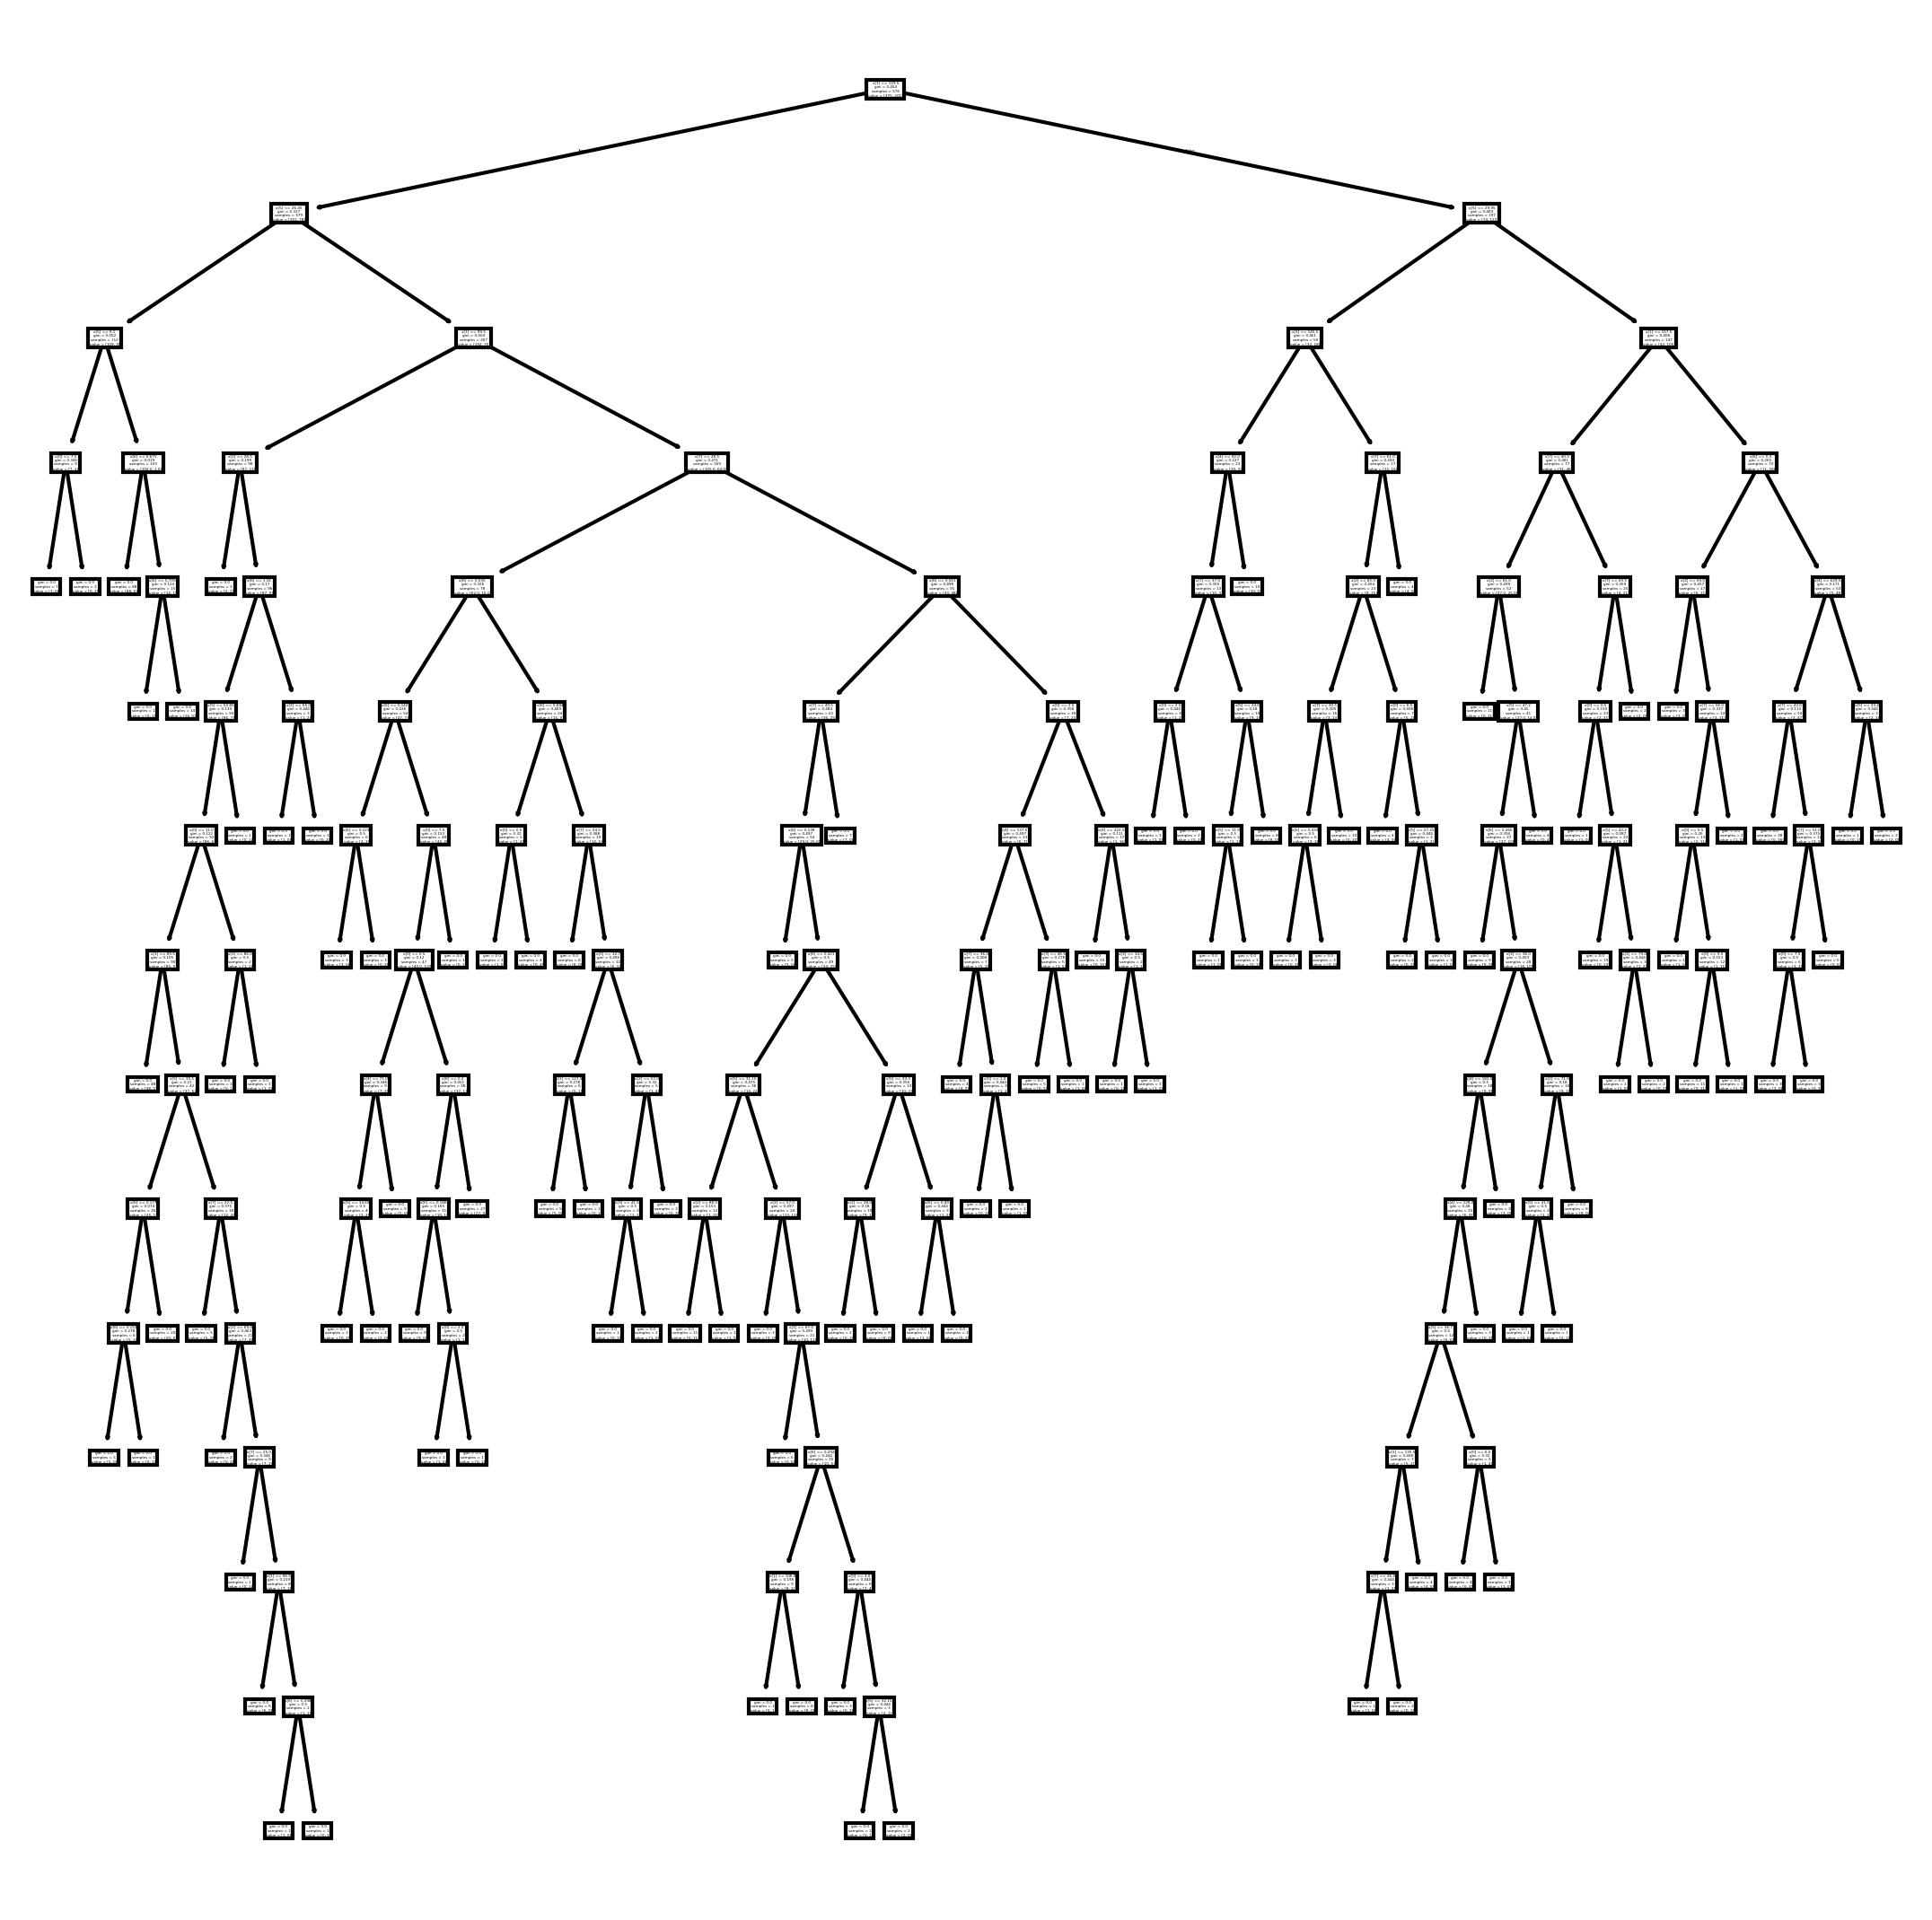

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=300)
tree.plot_tree(decisiontree_c)
plt.show()

Task 13

In [ ]:
# KNeighboursClassifier with 4 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#confustion matrix
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[112,  13],
       [ 37,  30]])

In [ ]:
#classication report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       125
           1       0.70      0.45      0.55        67

    accuracy                           0.74       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.74      0.72       192



task 14

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pm25_2016_2020.csv to pm25_2016_2020.csv


In [ ]:
pmdf = pd.read_csv('pm25_2016_2020.csv')
pmdf.head()

,Unnamed: 0,date_local,latitude_x,longitude_x,elevation,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,arithmetic_mean_a,arithmetic_mean_b
0,0,6/15/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.2
1,1,6/18/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,3.9
2,2,6/21/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,6.7
3,3,6/24/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,5.7
4,4,6/30/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.4


task 15

In [ ]:
x = pmdf[['latitude_x', 'longitude_x']]
x

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275
...,...,...
99995,42.978248,-112.455813
99996,42.978248,-112.455813
99997,42.978248,-112.455813
99998,42.978248,-112.455813


task 16

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

<ipython-input-24-05ffefc02baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = kmeans.fit_predict(x)
<ipython-input-24-05ffefc02baa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = x["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,2
1,39.024265,-95.711275,2
2,39.024265,-95.711275,2
3,39.024265,-95.711275,2
4,39.024265,-95.711275,2
...,...,...,...
99995,42.978248,-112.455813,1
99996,42.978248,-112.455813,1
99997,42.978248,-112.455813,1
99998,42.978248,-112.455813,1


task 17

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

<ipython-input-25-adc4d51a514b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = kmeans.fit_predict(x)
<ipython-input-25-adc4d51a514b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Clusters"] = x["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,2
1,39.024265,-95.711275,2
2,39.024265,-95.711275,2
3,39.024265,-95.711275,2
4,39.024265,-95.711275,2
...,...,...,...
99995,42.978248,-112.455813,1
99996,42.978248,-112.455813,1
99997,42.978248,-112.455813,1
99998,42.978248,-112.455813,1


In [ ]:
x["Clusters"].value_counts()

,count
Clusters,
0,28590
2,27603
1,26383
3,17151
4,273


task 18

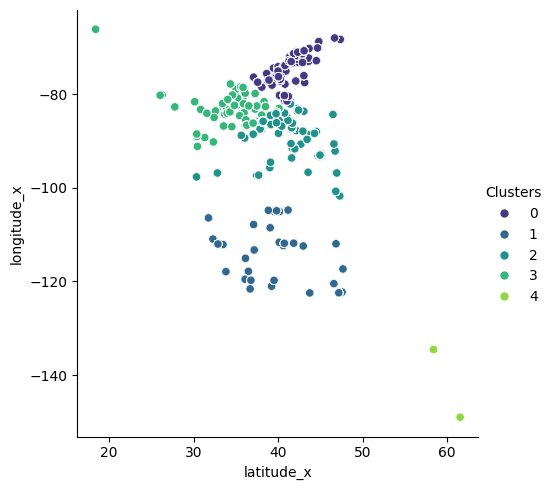

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.relplot(x='latitude_x',y='longitude_x',hue='Clusters',data=x,palette='viridis')